<a href="https://colab.research.google.com/github/AfifNawawi/LabAssignmentU2100685/blob/main/LabAssignmentU2100685.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing data


In [ ]:
from google.colab import files
uploaded = files.upload()
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('House Pricing.csv')
print (data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
print (data.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


<Axes: xlabel='price', ylabel='Count'>

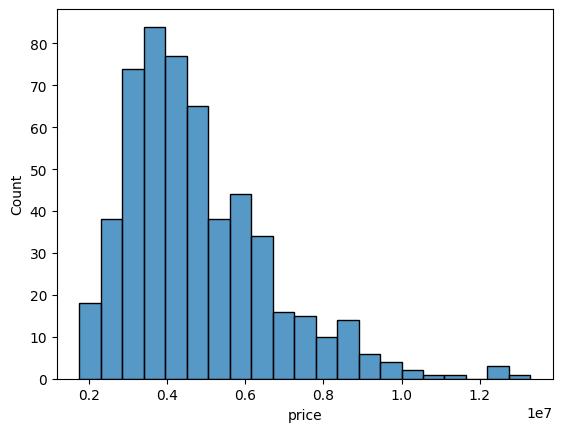

In [ ]:
sns.histplot(data['price'])

In [ ]:
data['mainroad'] = data['mainroad'].map({'yes':1,'no':0})
data['guestroom'] = data['guestroom'].map({'yes':1,'no':0})
data['basement'] = data['basement'].map({'yes':1,'no':0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes':1,'no':0})
data['airconditioning'] = data['airconditioning'].map({'yes':1,'no':0})
data['prefarea'] = data['prefarea'].map({'yes':1,'no':0})
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished':1,'semi-furnished':0.5,'unfurnished':0})
data.to_csv('newdata.csv',index=False)

Remove Outliers

In [ ]:
# Q1 and Q2
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)

# interquartile range
IQR = Q3 - Q1

# identify outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = data[(data['price'] < lower_bound)| (data['price'] > upper_bound)]

data = data.drop(outliers.index)

Normalizing the data

In [ ]:
MinMaxscaler = MinMaxScaler()
data.insert(0,'id',range(len(data)))
id = data.pop('id')
data_scaled = pd.DataFrame(MinMaxscaler.fit_transform(data), columns = data.columns)
data = pd.concat([data_scaled,id.reset_index(drop=True)],axis=1)
last_col = data.pop(data.columns[-1])
data.insert(0, last_col.name, last_col)
data.head()

,id,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,1.000000,0.311828,0.6,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.5
1,1,1.000000,0.354839,0.6,0.5,0.333333,1.0,1.0,1.0,0.0,1.0,0.333333,1.0,0.0
2,2,0.980952,0.491039,0.4,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,1.0
3,3,0.971429,0.211470,0.4,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.666667,0.0,1.0
4,4,0.966667,0.341935,0.4,0.5,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.5


Train and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['area',
                                                          'bedrooms',
                                                          'bathrooms',
                                                          'stories',
                                                          'mainroad',
                                                          'guestroom',
                                                          'basement',
                                                          'hotwaterheating',
                                                          'airconditioning',
                                                          'parking',
                                                          'prefarea',
                                                          'furnishingstatus']],data['price'], test_size=0.27 , random_state=97)



In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print("Coefficient: ")
print(reg.coef_)
print("Intercept: ")
print(reg.intercept_)
y_predict = reg.predict(X_test)
y_true = y_test


Coefficient: 
[0.39718008 0.05600616 0.20185842 0.18043782 0.06613232 0.04772309
 0.04295189 0.09950624 0.10901402 0.09233378 0.06058122 0.05752834]
Intercept: 
0.013749360894544982


Model Evaluation

MAE: 
0.0824555538991669
MSE: 
0.012921578595177842
RMSE: 
0.11367312169188389


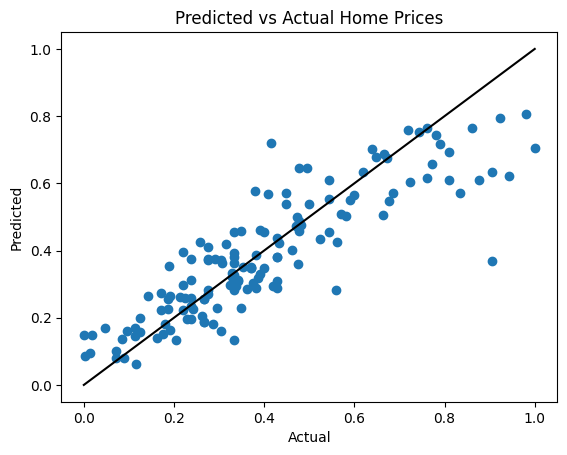

Accuracy of the model is 75.319985%


In [ ]:
# Print result of MAE
print("MAE: ")
print(metrics.mean_absolute_error(y_test, y_predict))

# Print result of MSE
print("MSE: ")
print(metrics.mean_squared_error(y_true, y_predict))

# Print result of RMSE
print("RMSE: ")
print(np.sqrt(metrics.mean_squared_error(y_true, y_predict)))

# plotting graph
plt.scatter(y_test, y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Home Prices')
plt.show()

print("Accuracy of the model is {:2f}%".format(reg.score(X_test, y_test)*100))

# New Section